<a href="https://colab.research.google.com/github/sivareddy905/TOP-10-Global_Company_Stocks_Predictions/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
data=pd.read_csv("/content/top_10_stock_data.csv")
data.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000


In [ ]:
data.shape

(25486, 8)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,25486.0,1.228808e+02,1.154477e+02,0.481250,3.999250e+01,9.127225e+01,1.657000e+02,9.562000e+02
High,25486.0,1.241558e+02,1.166479e+02,0.487500,4.022250e+01,9.233475e+01,1.672084e+02,9.725300e+02
Low,25486.0,1.215845e+02,1.141761e+02,0.473500,3.966438e+01,9.032825e+01,1.640275e+02,9.499500e+02
Close,25486.0,1.229108e+02,1.154477e+02,0.478500,3.995025e+01,9.123425e+01,1.656175e+02,9.544800e+02
Adj Close,25486.0,1.208390e+02,1.154703e+02,0.459453,3.800530e+01,9.003142e+01,1.648850e+02,9.544800e+02
Volume,25486.0,7.770094e+07,1.571748e+08,0.000000,7.839552e+06,2.504400e+07,6.082800e+07,3.692928e+09


In [ ]:
# if we want particular data set
data["High"]

,High
0,27.860001
1,27.162500
2,26.857500
3,27.049999
4,28.037500
...,...
25481,960.500000
25482,955.000000
25483,972.479980
25484,958.340027


In [ ]:
# let's Start Machine Learning Models
# Handling the missing values
# Check for missing values
data.isnull().sum()




,0
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Drop or fill missing values
data = data.dropna()  # or df.fillna(method='ffill') to forward fill

In [ ]:
df=data

In [ ]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date (just in case it's not sorted)
data = data.sort_values(by='Date')

# Selecting 'Close' price as the feature and target
# 'Shift' is used to create a target variable which is the next day's price.
data['Target'] = data['Close'].shift(-1)

# Drop the last row since it has no target
data = data.dropna()


In [ ]:
data

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Target
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400,0.503250
4862,2015-01-02,NVDA,0.503250,0.507000,0.495250,0.503250,0.483218,113680000,26.168653
9724,2015-01-02,GOOG,26.378078,26.490770,26.133251,26.168653,26.138908,28951268,15.426000
12155,2015-01-02,AMZN,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,78.449997
15762,2015-01-02,META,78.580002,78.930000,77.699997,78.449997,78.289124,18177500,46.759998
...,...,...,...,...,...,...,...,...,...
23054,2024-08-29,TSM,168.649994,175.419998,167.509995,169.149994,169.149994,13202300,163.399994
12154,2024-08-29,GOOG,166.059998,167.630005,161.981995,163.399994,163.399994,17125000,161.779999
9723,2024-08-29,GOOGL,164.309998,165.970001,160.250000,161.779999,161.779999,19673800,413.119995
4861,2024-08-29,MSFT,414.940002,422.049988,410.600006,413.119995,413.119995,17030800,229.789993


In [ ]:
# Example: Use past 5 days' closing prices as features
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_3'] = data['Close'].shift(3)
data['Lag_4'] = data['Close'].shift(4)
data['Lag_5'] = data['Close'].shift(5)

# Drop rows with missing values
data = data.dropna()

# Define the features and target
X = data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']]  # Features: past 5 days' close prices
y = data['Target']  # Target: Next day's price


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 33094.80112155698


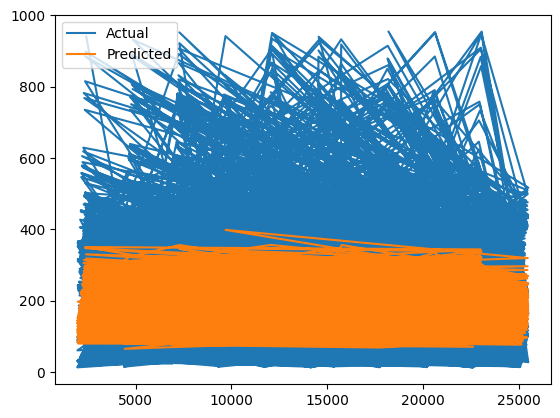

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()
